# Portfolio with the Maximum Sortino Ratio for the Consumer Durables Se 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'DIXON.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 
          'RELAXO.NS', 'BLUESTARCO.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("consumer_durable_1.csv")

In [2]:
df = pd.read_csv("consumer_durable.csv", index_col=0)

In [3]:
df.head()

TITAN.NS  HAVELLS.NS   VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                        
2017-01-02  324.632446  327.347351  310.122803   142.557556    429.723358   
2017-01-03  338.436218  328.304962  314.183441   149.009232    445.099762   
2017-01-04  349.615417  336.252869  317.110962   145.472763    445.292053   
2017-01-05  348.060028  344.296448  325.279510   141.649551    452.067261   
2017-01-06  345.289551  345.493469  317.724731   142.270828    453.845184   

            KAJARIACER.NS  RAJESHEXPO.NS   RELAXO.NS  BLUESTARCO.NS  
Date                                                                 
2017-01-02     467.467163     462.599792  200.826370     458.944794  
2017-01-03     470.103119     472.820251  197.780533     466.757416  
2017-01-04     465.262604     483.239166  198.498657     467.090851  
2017-01-05     473.841309     503.680084  199.216766     468.853485  
2017-01-06     471.780518     500.852081  198.696762     468.758209

In [4]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2017-01-03  0.041642    0.002921   0.013009     0.044262      0.035157   
2017-01-04  0.032498    0.023921   0.009275    -0.024019      0.000432   
2017-01-05 -0.004459    0.023640   0.025433    -0.026633      0.015101   
2017-01-06 -0.007992    0.003471  -0.023499     0.004376      0.003925   
2017-01-09 -0.001691    0.010751   0.016069     0.007696     -0.019673   
...              ...         ...        ...          ...           ...   
2021-12-27  0.005096    0.009979  -0.000627     0.003704     -0.002550   
2021-12-28  0.020611    0.018130   0.009364     0.005760      0.002879   
2021-12-29  0.009327   -0.004331  -0.004775    -0.011553     -0.008662   
2021-12-30  0.014527   -0.004819  -0.002042     0.004406      0.003639   
2021-12-31  0.034320    0.007112   0.016833     0.012074      0.029579   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2017-01-03       0.005623       0.021853  -0.015283       0.016880  
2017-01-04      -0.010350       0.021796   0.003624       0.000714  
2017-01-05       0.018270       0.041430   0.003611       0.003767  
2017-01-06      -0.004359      -0.005631  -0.002614      -0.000203  
2017-01-09       0.027454      -0.017790  -0.005374       0.009507  
...                   ...            ...        ...            ...  
2021-12-27      -0.017061      -0.001141  -0.008560       0.035536  
2021-12-28       0.016119       0.005358   0.015052       0.000642  
2021-12-29       0.011860      -0.000267   0.003629      -0.002520  
2021-12-30       0.040339      -0.019292   0.041514       0.022212  
2021-12-31       0.003923       0.004553   0.002974      -0.021026  

[1235 rows x 9 columns]

In [5]:
assets = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 
          'RELAXO.NS', 'BLUESTARCO.NS']
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df.shape

(1235, 9)

In [7]:
df.head()

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2017-01-03  0.041642    0.002921   0.013009     0.044262      0.035157   
2017-01-04  0.032498    0.023921   0.009275    -0.024019      0.000432   
2017-01-05 -0.004459    0.023640   0.025433    -0.026633      0.015101   
2017-01-06 -0.007992    0.003471  -0.023499     0.004376      0.003925   
2017-01-09 -0.001691    0.010751   0.016069     0.007696     -0.019673   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2017-01-03       0.005623       0.021853  -0.015283       0.016880  
2017-01-04      -0.010350       0.021796   0.003624       0.000714  
2017-01-05       0.018270       0.041430   0.003611       0.003767  
2017-01-06      -0.004359      -0.005631  -0.002614      -0.000203  
2017-01-09       0.027454      -0.017790  -0.005374       0.009507

In [8]:
df_training = df[0:987]
df_training.columns

Index(['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS', 'BATAINDIA.NS',
       'KAJARIACER.NS', 'RAJESHEXPO.NS', 'RELAXO.NS', 'BLUESTARCO.NS'],
      dtype='object')

In [9]:
df_training.shape

(987, 9)

In [10]:
df_training.tail()

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2020-12-24  0.003382    0.002850  -0.012682     0.010295     -0.009964   
2020-12-28  0.031357    0.008558   0.006208     0.001682      0.026343   
2020-12-29 -0.002238    0.005683  -0.002024     0.033607     -0.015842   
2020-12-30  0.008084   -0.004522   0.006670    -0.002170     -0.002085   
2020-12-31  0.009328    0.012632   0.007111     0.032584     -0.000917   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2020-12-24      -0.016406      -0.000410   0.027261       0.000507  
2020-12-28      -0.002470       0.000718   0.001861      -0.013527  
2020-12-29       0.003702      -0.002875  -0.008654       0.017511  
2020-12-30      -0.000580       0.001233   0.002124       0.011860  
2020-12-31       0.020026       0.007674   0.010428      -0.000562

In [11]:
df_test= df[987:]
df_test.head()

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2021-01-01 -0.005471   -0.006845   0.007000    -0.006591     -0.003647   
2021-01-04 -0.004953    0.009734   0.017348    -0.011573      0.013223   
2021-01-05  0.012845    0.018226  -0.010277     0.009720      0.008336   
2021-01-06  0.001050    0.010842   0.037446     0.017209      0.030678   
2021-01-07 -0.019423    0.026447   0.013937     0.028630     -0.010579   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2021-01-01       0.008139      -0.011275   0.022772       0.006904  
2021-01-04      -0.001552      -0.002167   0.010568       0.000991  
2021-01-05       0.001763       0.000207   0.065591       0.012064  
2021-01-06       0.001760      -0.010487   0.005522      -0.011445  
2021-01-07       0.017849       0.006658  -0.021706      -0.012392

In [12]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0     0.053993     0.040741   0.040967             1.005558  0.834386   
1     0.071618     0.044064   0.042002             0.953202  1.171424   
2     0.071685     0.046500   0.044811             0.963670  1.111511   
3     0.094395     0.057912   0.055412             0.956821  1.284617   
4     0.095979     0.059854   0.058193             0.972261  1.269413   
...        ...          ...        ...                  ...       ...   
9995  0.113924     0.071605   0.067889             0.948102  1.311693   
9996  0.120198     0.084178   0.082679             0.982196  1.190319   
9997  0.073602     0.056190   0.055755             0.992249  0.953937   
9998  0.132949     0.080120   0.076989             0.960910  1.409737   
9999  0.151716     0.089735   0.087628             0.976526  1.467844   

      TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
0     0.015762    0.027455   0.163723     0.136584      0.236592   
1     0.075343    0.065478   0.098271     0.119419      0.141910   
2     0.060781    0.042684   0.146165     0.158420      0.043673   
3     0.104659    0.070157   0.137841     0.156912      0.072608   
4     0.131013    0.000304   0.175061     0.187932      0.108603   
...        ...         ...        ...          ...           ...   
9995  0.098395    0.157274   0.135179     0.171219      0.055644   
9996  0.063857    0.073802   0.304459     0.110434      0.100114   
9997  0.006161    0.079202   0.204042     0.162159      0.122824   
9998  0.163593    0.103065   0.163404     0.034402      0.112207   
9999  0.217052    0.093099   0.163039     0.108340      0.028424   

      KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
0          0.170835       0.159123   0.060242       0.029684  
1          0.135269       0.130745   0.160374       0.073193  
2          0.108181       0.179644   0.111553       0.148898  
3          0.184746       0.003913   0.007355       0.261808  
4          0.097722       0.126669   0.086545       0.086150  
...             ...            ...        ...            ...  
9995       0.085175       0.118240   0.022731       0.156144  
9996       0.183181       0.123963   0.012537       0.027653  
9997       0.214901       0.020198   0.033403       0.157110  
9998       0.192134       0.083842   0.143019       0.004332  
9999       0.186659       0.132535   0.024601       0.046252  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  TITAN.NS  \
0  0.053993     0.040741   0.040967             1.005558  0.834386  0.015762   
1  0.071618     0.044064   0.042002             0.953202  1.171424  0.075343   
2  0.071685     0.046500   0.044811             0.963670  1.111511  0.060781   
3  0.094395     0.057912   0.055412             0.956821  1.284617  0.104659   
4  0.095979     0.059854   0.058193             0.972261  1.269413  0.131013   

   HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  KAJARIACER.NS  \
0    0.027455   0.163723     0.136584      0.236592       0.170835   
1    0.065478   0.098271     0.119419      0.141910       0.135269   
2    0.042684   0.146165     0.158420      0.043673       0.108181   
3    0.070157   0.137841     0.156912      0.072608       0.184746   
4    0.000304   0.175061     0.187932      0.108603       0.097722   

   RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
0       0.159123   0.060242       0.029684  
1       0.130745   0.160374       0.073193  
2       0.179644   0.111553       0.148898  
3       0.003913   0.007355       0.261808  
4       0.126669   0.086545       0.086150

In [13]:
df.head()

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2017-01-03  0.041642    0.002921   0.013009     0.044262      0.035157   
2017-01-04  0.032498    0.023921   0.009275    -0.024019      0.000432   
2017-01-05 -0.004459    0.023640   0.025433    -0.026633      0.015101   
2017-01-06 -0.007992    0.003471  -0.023499     0.004376      0.003925   
2017-01-09 -0.001691    0.010751   0.016069     0.007696     -0.019673   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2017-01-03       0.005623       0.021853  -0.015283       0.016880  
2017-01-04      -0.010350       0.021796   0.003624       0.000714  
2017-01-05       0.018270       0.041430   0.003611       0.003767  
2017-01-06      -0.004359      -0.005631  -0.002614      -0.000203  
2017-01-09       0.027454      -0.017790  -0.005374       0.009507

In [14]:
df_training = df[0:987]
df_training.columns

Index(['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS', 'BATAINDIA.NS',
       'KAJARIACER.NS', 'RAJESHEXPO.NS', 'RELAXO.NS', 'BLUESTARCO.NS'],
      dtype='object')

In [15]:
df_training.shape

(987, 9)

In [16]:
df_test= df[987:]
df_test.head()

TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2021-01-01 -0.005471   -0.006845   0.007000    -0.006591     -0.003647   
2021-01-04 -0.004953    0.009734   0.017348    -0.011573      0.013223   
2021-01-05  0.012845    0.018226  -0.010277     0.009720      0.008336   
2021-01-06  0.001050    0.010842   0.037446     0.017209      0.030678   
2021-01-07 -0.019423    0.026447   0.013937     0.028630     -0.010579   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2021-01-01       0.008139      -0.011275   0.022772       0.006904  
2021-01-04      -0.001552      -0.002167   0.010568       0.000991  
2021-01-05       0.001763       0.000207   0.065591       0.012064  
2021-01-06       0.001760      -0.010487   0.005522      -0.011445  
2021-01-07       0.017849       0.006658  -0.021706      -0.012392

In [17]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.184598
Downside SD            0.105273
Upside SD              0.111674
Volatility Skewness    1.060809
Sortino                1.563537
TITAN.NS               0.340807
HAVELLS.NS             0.162131
VOLTAS.NS              0.022500
CROMPTON.NS            0.044671
BATAINDIA.NS           0.100956
KAJARIACER.NS          0.098149
RAJESHEXPO.NS          0.027341
RELAXO.NS              0.146774
BLUESTARCO.NS          0.056672
Name: 2963, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                   0.010238
Downside SD            0.005864
Upside SD              0.006037
Volatility Skewness    1.029636
Sortino               -1.664899
TITAN.NS               0.016998
HAVELLS.NS             0.009507
VOLTAS.NS              0.003793
CROMPTON.NS            0.247542
BATAINDIA.NS           0.282315
KAJARIACER.NS          0.020764
RAJESHEXPO.NS          0.132432
RELAXO.NS              0.214103
BLUESTARCO.NS          0.072548
Name: 1977, dtype: float64

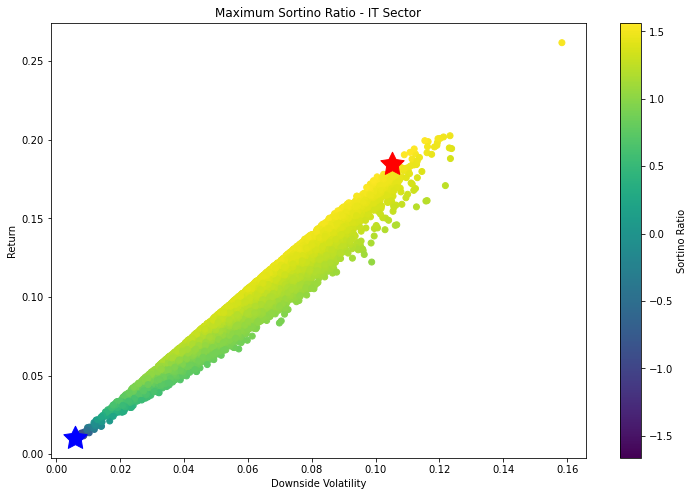

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

plt.title('Maximum Sortino Ratio - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [18]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0612, 0.1341, 0.0668, 0.0778, 0.0880, 0.0324, 0.2305, 0.2031, 0.1062]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 
                                   'RAJESHEXPO.NS', 'RELAXO.NS', 'BLUESTARCO.NS'])
w_1.columns = ['weights']
w_1

[0.0612, 0.1341, 0.0668, 0.0778, 0.088, 0.0324, 0.2305, 0.2031, 0.1062]


weights
TITAN.NS        0.0612
HAVELLS.NS      0.1341
VOLTAS.NS       0.0668
CROMPTON.NS     0.0778
BATAINDIA.NS    0.0880
KAJARIACER.NS   0.0324
RAJESHEXPO.NS   0.2305
RELAXO.NS       0.2031
BLUESTARCO.NS   0.1062

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.3408, 0.1621, 0.0225, 0.0447, 0.1011, 0.0981, 0.0273, 0.1468, 0.0567]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 
          'RELAXO.NS', 'BLUESTARCO.NS'])
w_2.columns = ['weights']
w_2

weights
TITAN.NS        0.3408
HAVELLS.NS      0.1621
VOLTAS.NS       0.0225
CROMPTON.NS     0.0447
BATAINDIA.NS    0.1011
KAJARIACER.NS   0.0981
RAJESHEXPO.NS   0.0273
RELAXO.NS       0.1468
BLUESTARCO.NS   0.0567

In [20]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.3515, 0.0639, 0.0427, 0.0685, 0.1699, 0.0425, 0.1231, 0.1161, 0.0217]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_3 = pd.DataFrame(w_raw, index = ['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 
          'RELAXO.NS', 'BLUESTARCO.NS'])
w_3.columns = ['weights']
w_3

weights
TITAN.NS        0.3515
HAVELLS.NS      0.0639
VOLTAS.NS       0.0427
CROMPTON.NS     0.0685
BATAINDIA.NS    0.1699
KAJARIACER.NS   0.0425
RAJESHEXPO.NS   0.1231
RELAXO.NS       0.1161
BLUESTARCO.NS   0.0217

In [21]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
TITAN.NS             0.0612         0.3408        0.3515
HAVELLS.NS           0.1341         0.1621        0.0639
VOLTAS.NS            0.0668         0.0225        0.0427
CROMPTON.NS          0.0778         0.0447        0.0685
BATAINDIA.NS         0.0880         0.1011        0.1699
KAJARIACER.NS        0.0324         0.0981        0.0425
RAJESHEXPO.NS        0.2305         0.0273        0.1231
RELAXO.NS            0.2031         0.1468        0.1161
BLUESTARCO.NS        0.1062         0.0567        0.0217

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

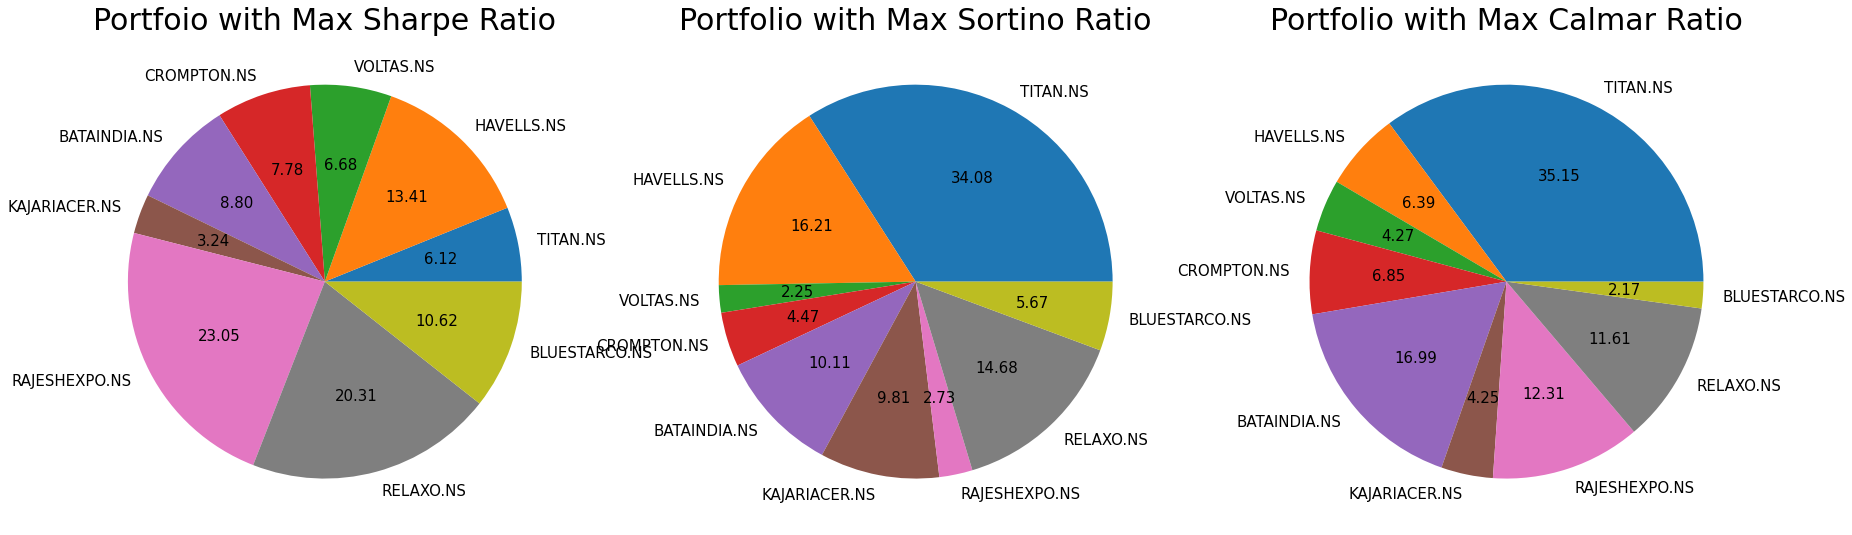

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio',fontsize = 30)


#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [23]:
df_training.shape

(987, 9)

In [24]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [25]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.014255                     0.020352   
2017-01-04                    0.009486                     0.014284   
2017-01-05                    0.015128                     0.006888   
2017-01-06                   -0.002899                    -0.003074   
2017-01-09                   -0.002013                     0.001841   
2017-01-10                    0.008551                     0.010682   
2017-01-11                    0.009544                     0.007660   
2017-01-12                    0.006038                     0.007676   
2017-01-13                   -0.002510                    -0.005074   
2017-01-16                    0.006490                     0.008700   
2017-01-17                   -0.004755                    -0.004142   
2017-01-18                    0.010365                     0.012929   
2017-01-19                    0.005225                     0.011836   
2017-01-20                   -0.005233                    -0.008468   
2017-01-23                    0.011943                     0.013709   
2017-01-24                    0.005260                     0.007593   
2017-01-25                    0.014284                     0.017837   
2017-01-27                    0.012485                     0.006680   
2017-01-30                   -0.004742                    -0.002630   
2017-01-31                   -0.002988                    -0.011215   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.025905  
2017-01-04                    0.014455  
2017-01-05                    0.008148  
2017-01-06                   -0.003810  
2017-01-09                   -0.003477  
2017-01-10                    0.012114  
2017-01-11                    0.008415  
2017-01-12                    0.007666  
2017-01-13                   -0.008105  
2017-01-16                    0.006420  
2017-01-17                   -0.005513  
2017-01-18                    0.010649  
2017-01-19                    0.008634  
2017-01-20                   -0.014223  
2017-01-23                    0.011489  
2017-01-24                    0.004779  
2017-01-25                    0.019527  
2017-01-27                    0.007385  
2017-01-30                   -0.003343  
2017-01-31                   -0.010560

<AxesSubplot:xlabel='Date', ylabel='Return'>

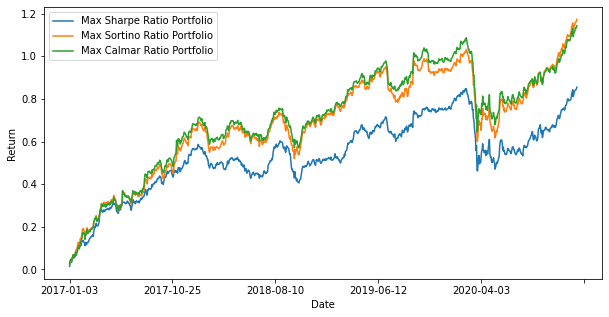

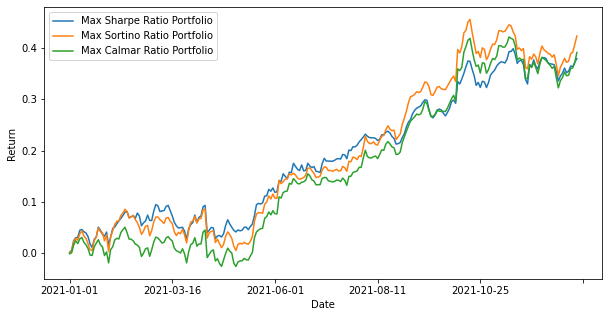

In [26]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [27]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.218227
Max Sortino Ratio Portfolio    0.299492
Max Calmar Ratio Portfolio     0.291892
dtype: float64

In [28]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.385367
Max Sortino Ratio Portfolio    0.430265
Max Calmar Ratio Portfolio     0.397443
dtype: float64